# 타이타닉 데이터로 머신러닝을 통해 생존율을 파악
https://www.kangtaeho.com/89

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# matplotlib style 선택가능 https://ddiri01.tistory.com/309
plt.style.use('fivethirtyeight')

# 경고 제어 => 경고 메시지 숨김
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline

In [5]:
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


먼저 데이터 중 NaN이 있는지 확인하자. NaN 값이 있으면 데이터 분석할 때 오차가 발생할 수 있다.

In [6]:
data.isnull() # => NaN인지 아닌지에 따라 데이터가 True/False로 나온다.
# data.isnull().sum() # => 각 열마다 NaN 개수를 찾아준다.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# data 열 구분 안하고 mean()을 해주면 숫자 데이터만 되고 범주형 데이터는 안 됨
data = data.fillna(data.mean())

In [8]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- plt.subplots: 한 번에 여러 개의 그래프를 그리는 방법

In [9]:
data.survived.value_counts()


0    549
1    342
Name: survived, dtype: int64

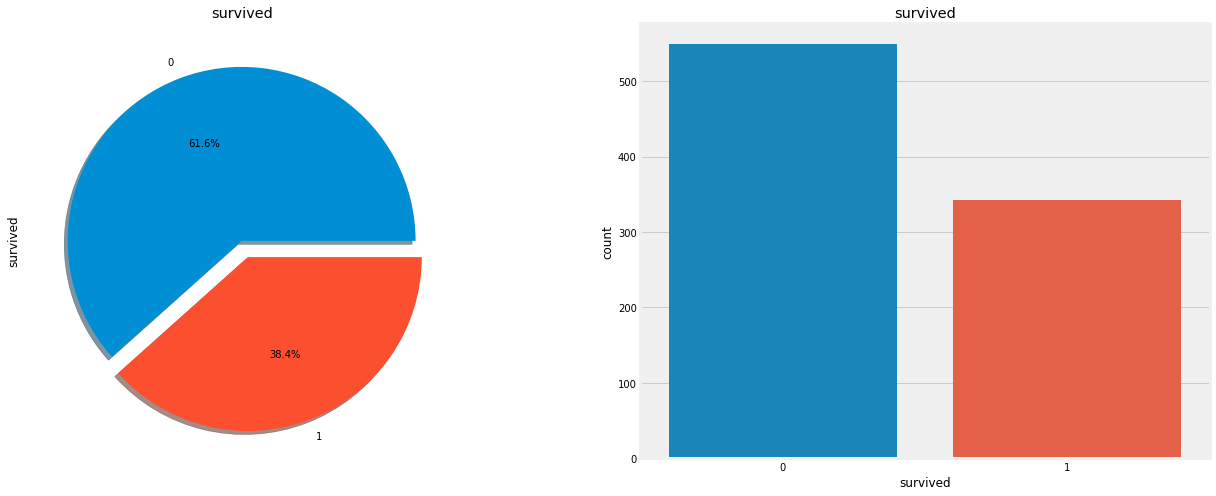

In [10]:
# plt.subplot( 가로 , 세로 => 가로x세로 만큼의 그래프 얻기, figsize = figsize)
figure, ax = plt.subplots(1,2, figsize=(20,8))
# figure: 전체 그림, axes: 낱개의 그림 

data.survived.value_counts().plot.pie(explode=[0, 0.1], autopct='%.1f%%', ax=ax[0], shadow=True)
# explode: 떨어뜨리는 정도
# autopct: 소숫점 1째자리까지 표현. 원래는 '%.1f%'이면 끝나는데
# ax: ax중에 어느 걸 쓸 건지
ax[0].set_title('survived')
ax[0].set_ylabel('survived')

sns.countplot('survived',data=data,ax=ax[1])
# ax: ax중에 어느 걸 쓸 건지
ax[1].set_title('survived')

plt.show() 

성별과 생존자 확인

In [11]:
data.groupby(['sex','survived'])[['survived']].count()

survived
sex    survived          
female 0               81
       1              233
male   0              468
       1              109

- sns.countplot(x='열 이름', y='축 이름', data=DataFrame) <br>
데이터프레임에만 사용가능

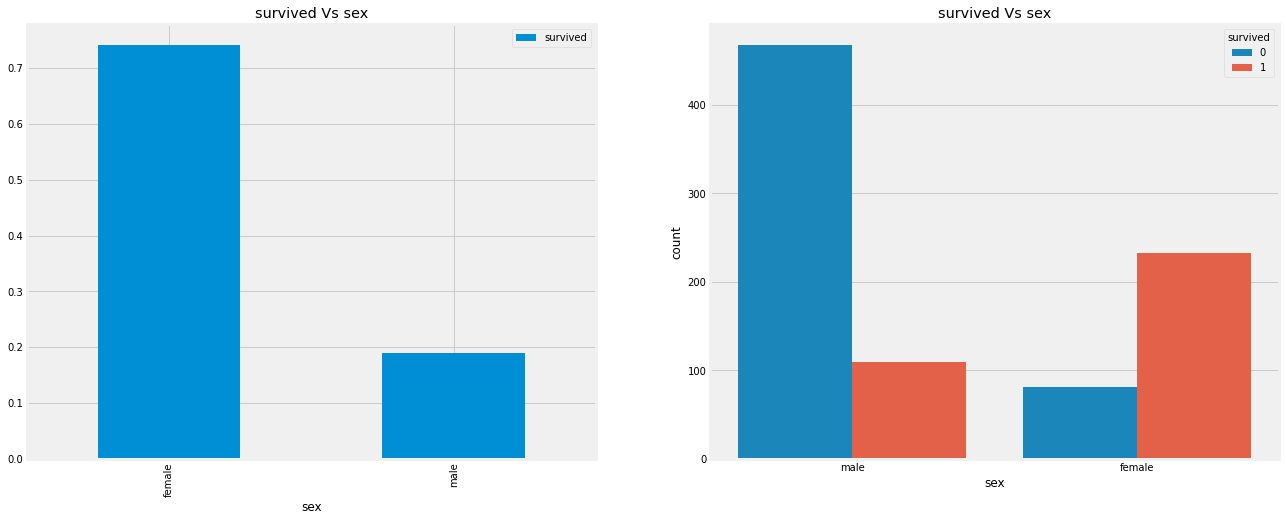

In [12]:
# 성별 당 생존률 확인
fx, ax = plt.subplots(1,2, figsize=(20,8))
data[['sex','survived']].groupby('sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('survived Vs sex')

sns.countplot('sex',None, hue='survived', data=data, ax=ax[1])
# 첫번째 parameter: 막대그래프 도수
# hue: 기준이 되는 열
ax[1].set_title('survived Vs sex')
plt.show()

객실 등급(PClass)에 따른 생존자 확인


In [16]:
# pd.crosstab(행,열). margins = True 하면 합계열이 오른쪽에 붙음
pd.crosstab(data['pclass'], data['survived'],margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


객실 별 생존자를 그래프로 확인

Text(0.5, 1.0, 'Pclass:Survived vs Dead')

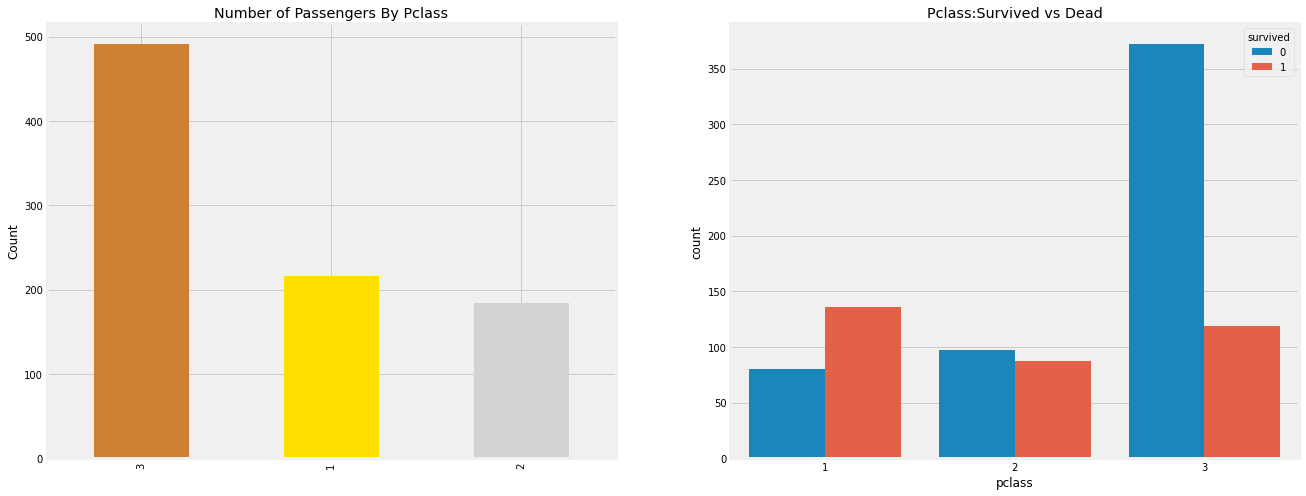

In [20]:
f, ax = plt.subplots(1,2, figsize = (20,8))
data.pclass.value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('pclass',None, hue='survived',data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

In [21]:
pd.crosstab([data.sex, data.survived], data.pclass, margins=True).style.background_gradient(cmap='summer_r')

 객실등급과 생존자의 관계를 성별로 나누어 살펴보자<br>
factorplot: 열 비율을 꺾은선그래프로 따져주네 <br>
 sns.factorplot('행','열',hue='열', data=DataFrame)



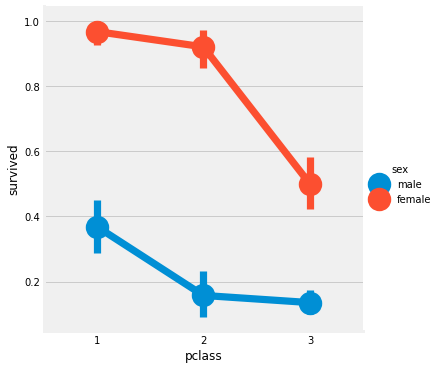

In [23]:
sns.factorplot('pclass','survived',hue='sex',data=data)

바이올린 플롯으로 객실과 나이에 대한 생존자 비율, 성별과 나이에 대한 생존자 비율을 살펴본다.

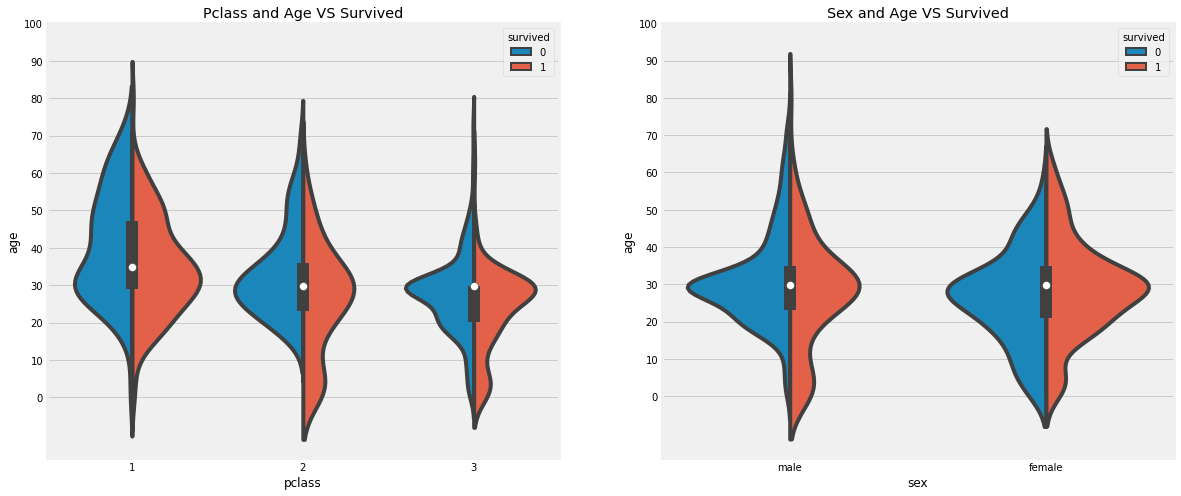

In [30]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("pclass","age",hue="survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("sex","age",hue="survived",data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()